# Plotting running times of search algoritms

Basic imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

Let's plot how capacity evolves with different algorithms for dynamic array capacity expansion

```

```

In [10]:
# this function must return an array with n*2 elements, reporting the capacity level
# at each time step considering linear expansion, considering n appends followed by n removes
def linear_expansion(n, dgrow = 500, dshrink = 1000):
    arr = np.array([])
    history = []
    capacity = 0

    # Crescita di n
    for i in range(n):
        if len(arr) >= capacity or (capacity - len(arr)) > dshrink:
            capacity = len(arr) + dgrow
            arr = np.resize(arr, capacity)
        arr = np.append(arr, i)
        history.append(capacity)

    # Descrescita di n
    for i in range(n):
        if len(arr) > 0:
            arr = arr[:-1]
            if len(arr) < capacity - dshrink:
                capacity = max(1, capacity - dgrow)
            history.append(capacity)
    
    return history

# this function must return an array with n*2 elements, reporting the capacity level
# at each time step considering geometric expansion, considering n appends followed by n removes
def geometric_expansion(n, fgrow = 5., fshrink = 5.5):
    arr = np.array([])
    history = []
    capacity = 0

    # Crescita di n
    for i in range(n):
        if len(arr) >= capacity or (capacity / len(arr)) > fshrink:
            capacity = len(arr) * fgrow
            arr = np.resize(arr, capacity)
        arr = np.append(arr, i)
        history.append(capacity)

    # Descrescita di n
    for i in range(n):
        if len(arr) > 0:
            arr = arr[:-1]
            if len(arr) < capacity // fshrink:
                capacity = max(1, capacity // fshrink)
            history.append(capacity)

    return history

KeyboardInterrupt: 

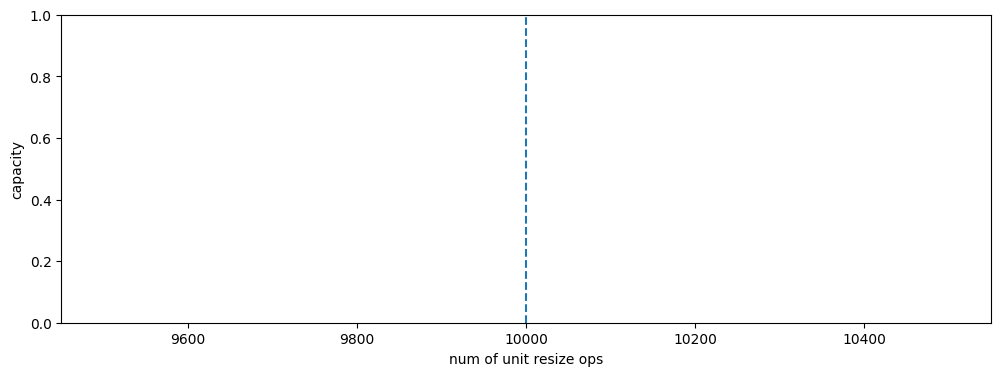

In [11]:
n = 10000
xs = np.arange(2*n)

dgrow = 500
dshrink = 2000
fgrow = 2.0
fshrink = 3.5
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(12,4)
ax1.axvline(x=n, linestyle='--')
ax1.set_ylabel("capacity")
ax1.set_xlabel("num of unit resize ops")
ax1.plot(xs, linear_expansion(n, dgrow, dshrink), label=f"linear(dgrow={dgrow},dshrink={dshrink})", color='red')
ax1.plot(xs, geometric_expansion(n, fgrow, fshrink), label=f"geometric(fgrow={fgrow},fshrink={fshrink})", color='blue')
ax1.legend(loc='upper left')
fig.show()